**IMPLEMENTATION OF TIME SERIES POCASTING USING ARIMA-SARIMAX**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from matplotlib import pyplot
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/pay.uk_assessment/Total_FPS.csv", index_col = 'Date', parse_dates = [0])



<ipython-input-182-9220c1d5f8e0>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data = pd.read_csv("/content/drive/MyDrive/pay.uk_assessment/Total_FPS.csv", index_col = 'Date', parse_dates = [0])


In [ ]:
data

,standing_order_payment,single_immediate_payment,forward_dated_payments
Date,,,
2008-05-31,0.01,332,1.5
2008-06-30,436,"3,226",498
2008-07-31,"1,316","4,669",992
2008-08-31,"2,511","4,441",968
2008-09-30,"5,377","5,099","1,148"
...,...,...,...
2022-12-31,"32,787","272,812","37,150"
2023-01-31,"33,263","282,893","34,917"
2023-02-28,"31,576","264,891","32,565"


In [ ]:
data.shape

(180, 3)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 180 entries, 2008-05-31 to 2023-04-30
Data columns (total 3 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   standing_order_payment    180 non-null    object
 1   single_immediate_payment  180 non-null    object
 2   forward_dated_payments    180 non-null    object
dtypes: object(3)
memory usage: 5.6+ KB


In [ ]:
data.isnull().sum()

standing_order_payment      0
single_immediate_payment    0
forward_dated_payments      0
dtype: int64

**Data Cleaning**

**The columns are in  object data type and has commas in values of thise columns  ,hence its necessary to remove those commas  and  also change the  data type of columns to the float**

In [ ]:
data['standing_order_payment']=data['standing_order_payment'].str.replace(',','')
data['single_immediate_payment'] = data['single_immediate_payment'].str.replace(',','')
data['forward_dated_payments'] = data['forward_dated_payments'].str.replace(',','')


In [ ]:
data['standing_order_payment']=data['standing_order_payment'].astype(float)
data['single_immediate_payment']=data['single_immediate_payment'].astype(float)
data['forward_dated_payments']=data['forward_dated_payments'].astype(float)

In [ ]:
data

,standing_order_payment,single_immediate_payment,forward_dated_payments
Date,,,
2008-05-31,0.010000000,332.000000000,1.500000000
2008-06-30,436.000000000,3226.000000000,498.000000000
2008-07-31,1316.000000000,4669.000000000,992.000000000
2008-08-31,2511.000000000,4441.000000000,968.000000000
2008-09-30,5377.000000000,5099.000000000,1148.000000000
...,...,...,...
2022-12-31,32787.000000000,272812.000000000,37150.000000000
2023-01-31,33263.000000000,282893.000000000,34917.000000000
2023-02-28,31576.000000000,264891.000000000,32565.000000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 180 entries, 2008-05-31 to 2023-04-30
Data columns (total 3 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   standing_order_payment    180 non-null    float64
 1   single_immediate_payment  180 non-null    float64
 2   forward_dated_payments    180 non-null    float64
dtypes: float64(3)
memory usage: 5.6 KB


In [ ]:
data.isnull().sum()

standing_order_payment      0
single_immediate_payment    0
forward_dated_payments      0
dtype: int64

In [ ]:
data['total_fps_payments'] = data.sum(axis = 1)

In [ ]:
data

,standing_order_payment,single_immediate_payment,forward_dated_payments,total_fps_payments
Date,,,,
2008-05-31,0.010000000,332.000000000,1.500000000,333.510000000
2008-06-30,436.000000000,3226.000000000,498.000000000,4160.000000000
2008-07-31,1316.000000000,4669.000000000,992.000000000,6977.000000000
2008-08-31,2511.000000000,4441.000000000,968.000000000,7920.000000000
2008-09-30,5377.000000000,5099.000000000,1148.000000000,11624.000000000
...,...,...,...,...
2022-12-31,32787.000000000,272812.000000000,37150.000000000,342749.000000000
2023-01-31,33263.000000000,282893.000000000,34917.000000000,351073.000000000
2023-02-28,31576.000000000,264891.000000000,32565.000000000,329032.000000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 180 entries, 2008-05-31 to 2023-04-30
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   standing_order_payment    180 non-null    float64
 1   single_immediate_payment  180 non-null    float64
 2   forward_dated_payments    180 non-null    float64
 3   total_fps_payments        180 non-null    float64
dtypes: float64(4)
memory usage: 7.0 KB


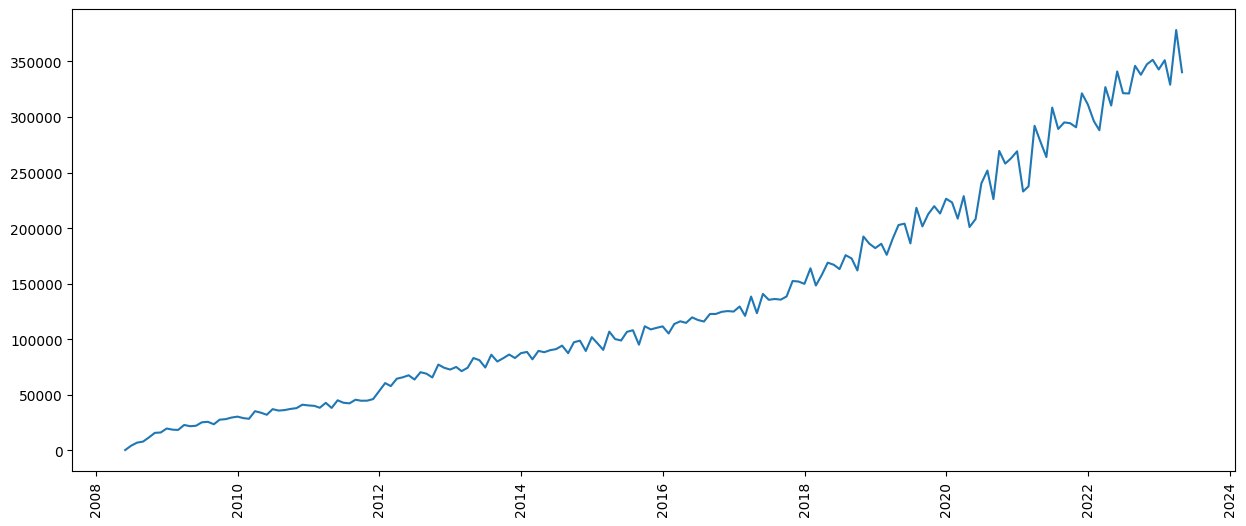

In [ ]:
plt.plot(data['total_fps_payments'])
plt.xticks(rotation= 90)
plt.show()

<Axes: xlabel='Date'>

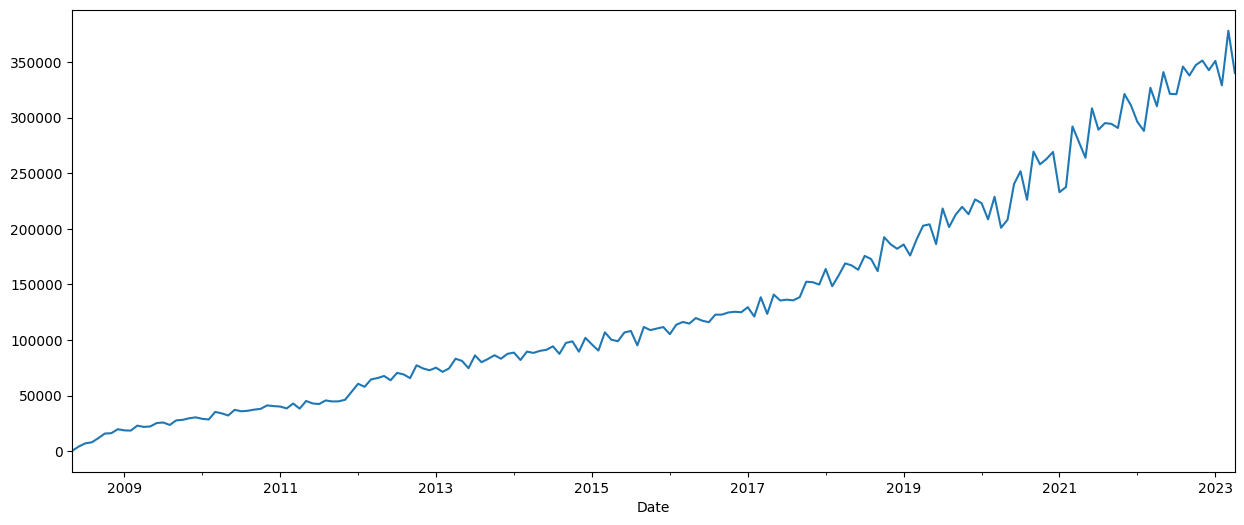

In [ ]:
data['total_fps_payments'].plot()

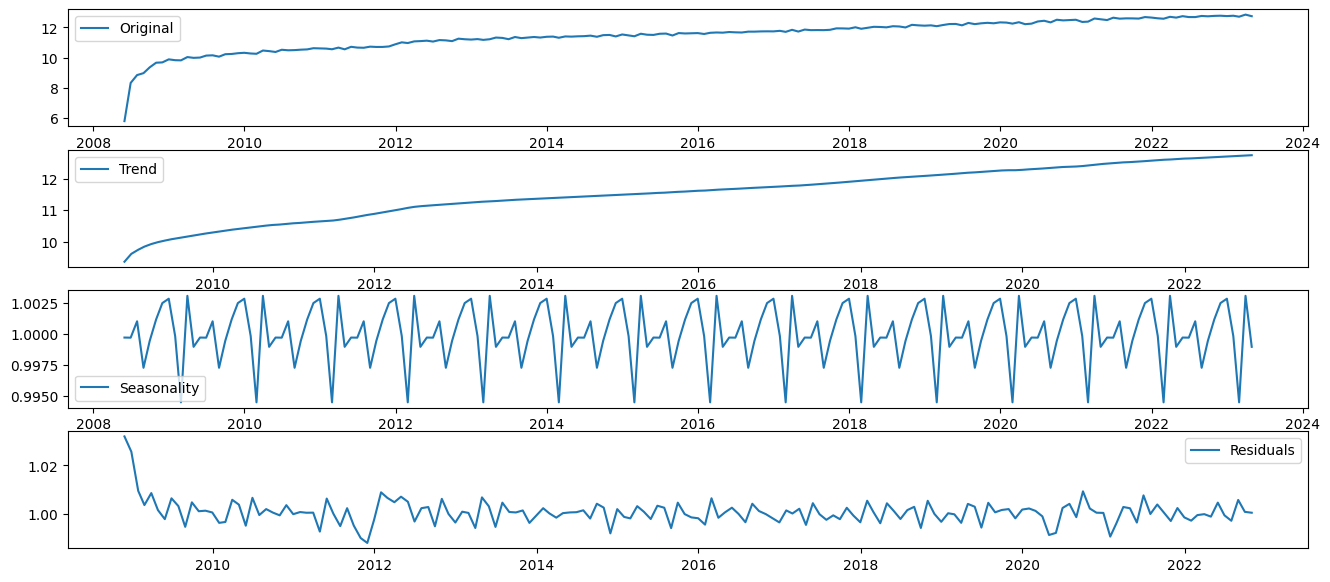

In [ ]:
#Decomposition
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(np.log(data['total_fps_payments']),model = 'multiplicative')

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(16,7))
fig = plt.figure(1)

plt.subplot(411)
plt.plot(np.log(data['total_fps_payments']), label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')

**Augumented  Dicky Fuller test**

In [ ]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    #rolmean = pd.rolling_mean(timeseries, window=12)
    rolmean = pd.Series(timeseries).rolling(window=12).mean()
    #rolstd = pd.rolling_std(timeseries, window=12)
    rolstd = pd.Series(timeseries).rolling(window=12).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

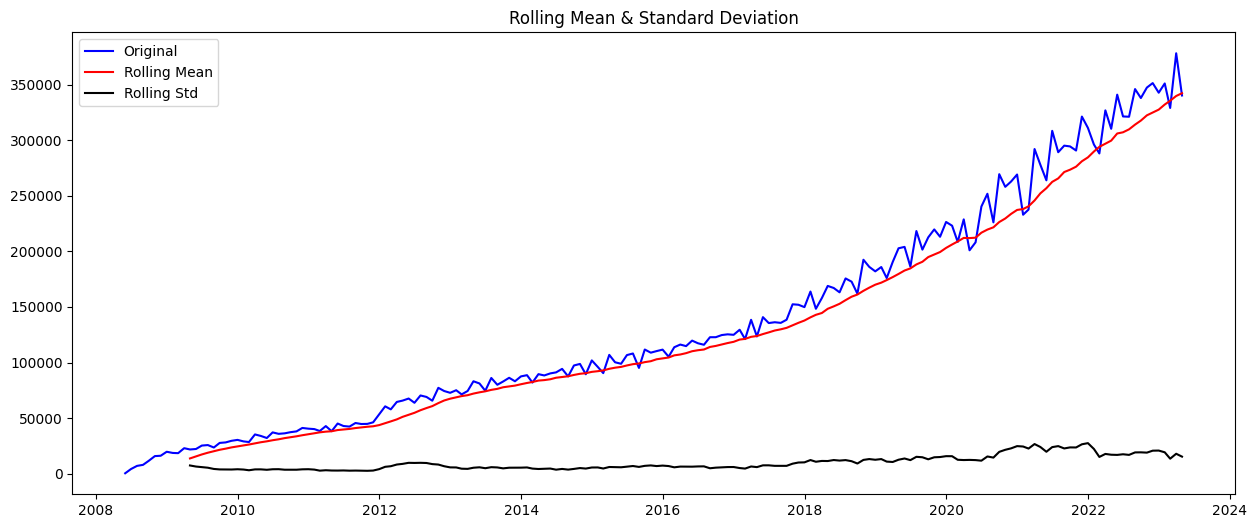

Results of Dickey-Fuller Test:
Test Statistic                  2.883242607
p-value                         1.000000000
#Lags Used                     14.000000000
Number of Observations Used   165.000000000
Critical Value (1%)            -3.470616370
Critical Value (5%)            -2.879221402
Critical Value (10%)           -2.576196814
dtype: float64


In [ ]:
test_stationarity(data['total_fps_payments'])

**Based on the results of the Dickey-Fuller Test, we can assess whether the data is stationary or not. The test statistic is compared against the critical values at different levels of significance (1%, 5%, and 10%) to make this determination.**

**In our case, the test statistic is 2.883243, and the p-value is 1.000000. Comparing the test statistic to the critical values, we find:**

**Critical Value (1%): -3.470616
Critical Value (5%): -2.879221
Critical Value (10%): -2.576197
Since the test statistic is greater than all the critical values, and the p-value is greater than the significance level of 0.05, we fail to reject the null hypothesis. This suggests that the data is non-stationary.**

In [ ]:
# make the not stationary time series , stationary by applying 
# 1 . transformations 
# 2 . Differencing 

In [ ]:
total_fps = data['total_fps_payments']
total_fps

Date
2008-05-31      333.510000000
2008-06-30     4160.000000000
2008-07-31     6977.000000000
2008-08-31     7920.000000000
2008-09-30    11624.000000000
                   ...       
2022-12-31   342749.000000000
2023-01-31   351073.000000000
2023-02-28   329032.000000000
2023-03-31   378225.000000000
2023-04-30   340257.000000000
Name: total_fps_payments, Length: 180, dtype: float64

In [ ]:
total_fps_log = np.log(data['total_fps_payments'])

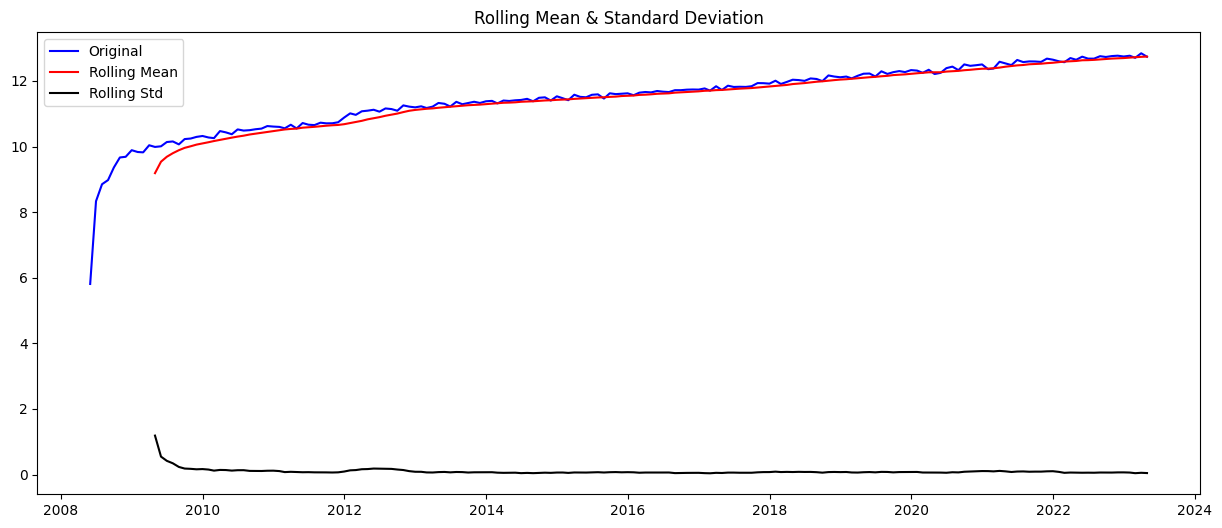

Results of Dickey-Fuller Test:
Test Statistic                 -2.545053624
p-value                         0.104893460
#Lags Used                     12.000000000
Number of Observations Used   167.000000000
Critical Value (1%)            -3.470126426
Critical Value (5%)            -2.879007599
Critical Value (10%)           -2.576082697
dtype: float64


In [ ]:
test_stationarity(total_fps_log)

**Based on the results of the Augmented Dickey-Fuller (ADF) test, the test statistic value of -2.545054 is more negative than the critical values at the 10% significance level (-2.576083), but it is greater than the critical values at the 1% and 5% significance levels (-3.470126 and -2.879008, respectively). Additionally, the p-value of 0.104893 is greater than the significance level of 0.05.**

**These results indicate that there is insufficient evidence to reject the null hypothesis of the ADF test. Therefore, we cannot conclude that the time series is stationary based on these results**

In [ ]:
#  Now lets try differencing the log transformed data with the 1st shift  of log transformed data and see if the data is stationary or not

In [ ]:
total_fps_log_diff = total_fps_log - total_fps_log.shift()

In [ ]:
total_fps_log_diff

Date
2008-05-31            NaN
2008-06-30    2.523597503
2008-07-31    0.517103951
2008-08-31    0.126772181
2008-09-30    0.383680720
                 ...     
2022-12-31   -0.024921083
2023-01-31    0.023995778
2023-02-28   -0.064839169
2023-03-31    0.139334246
2023-04-30   -0.105788042
Name: total_fps_payments, Length: 180, dtype: float64

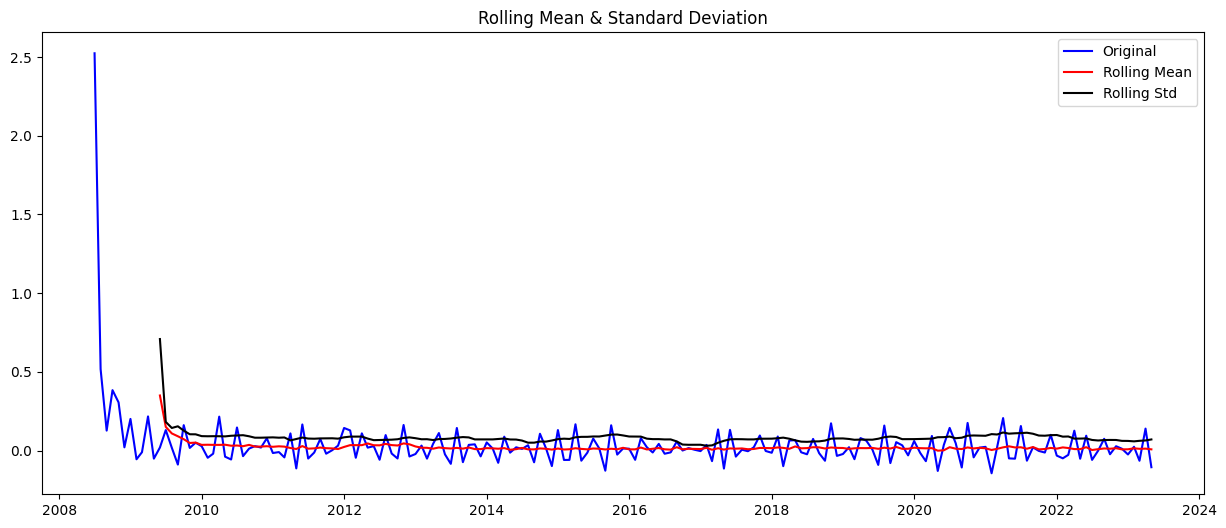

Results of Dickey-Fuller Test:
Test Statistic                 -3.642418725
p-value                         0.004999978
#Lags Used                     14.000000000
Number of Observations Used   164.000000000
Critical Value (1%)            -3.470865896
Critical Value (5%)            -2.879330279
Critical Value (10%)           -2.576254927
dtype: float64


In [ ]:
total_fps_log_diff.dropna(inplace=True)
test_stationarity(total_fps_log_diff)


**Based on the results of the Dickey-Fuller Test, we can assess whether the data is stationary or not. The test statistic is compared against the critical values at different levels of significance (1%, 5%, and 10%) to make this determination.**

**In your case, the test statistic is -3.642419, and the p-value is 0.005000. Comparing the test statistic to the critical values, we find:**

**Critical Value (1%): -3.470866
Critical Value (5%): -2.879330
Critical Value (10%): -2.576255**

**Since the test statistic is less than the critical values, and the p-value is less than the significance level of 0.05, we can reject the null hypothesis. This suggests that the data is stationary.**

In [ ]:

#FINAL FORECASTING
from statsmodels.tsa.arima_model import ARIMA

#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf  

lag_acf = acf(total_fps_log_diff, nlags=20)
lag_pacf = pacf(total_fps_log_diff, nlags=20, method='ols')


Text(0.5, 1.0, 'Autocorrelation Function')

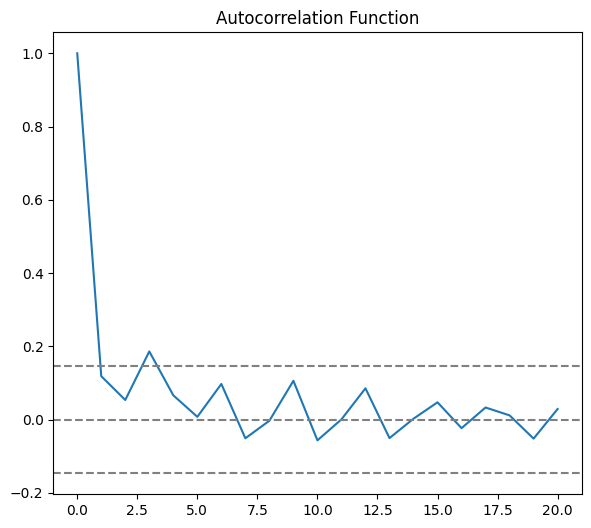

In [ ]:

#Plot ACF:    
plt.subplot(121)    
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(total_fps_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(total_fps_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

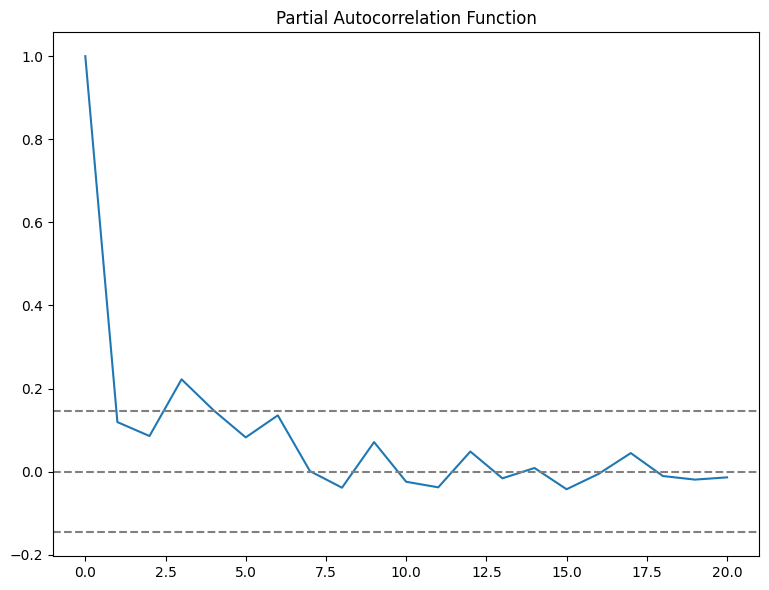

In [ ]:
#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(total_fps_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(total_fps_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

**From the Graph we can choose the value of Q from ACF curve , which is the first upper threshold where the curve crosses, and its value Q = 1.**

**Also from the Graph the value of P is choosen from PACF curve , which is also the first upper threshold where the curve crosses ,and its value  P = 1.**

**ACF/PACF plots are some traditional  methods of obtaining p and q values , and are sometimes misleading .hence we need to perform hyperparameter tuning in time series .Analyze to get optimum p ,d ,q values**

**HYPER PARAMETER TUNING TO FIND THE VALUES  OF P,D,Q and the best model by using Auto ARIMA**

In [ ]:
from pandas import read_csv
from pandas import datetime
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

<ipython-input-211-645c0b1fbf8c>:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [ ]:
!pip install pmdarima 
from pmdarima.arima import auto_arima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
X = total_fps_log_diff
size = int(len(X) * .7)
train, test = X[0:size], X[size:len(X)]


In [ ]:
arima_model = auto_arima(data['total_fps_payments'], start_p=1, start_q=1, d=1, max_p=5, max_q=5, start_P=1, 
                         D=None, start_Q=1, max_P=4, max_D=1, max_Q=4, max_order=5, m=1, 
                         seasonal=True, stationary=False, information_criterion='aic', 
                         alpha=0.05, test='kpss', seasonal_test='ocsb', stepwise=True, 
                         n_jobs=1, start_params=None, trend=None, method='lbfgs', 
                         maxiter=50, offset_test_args=None, seasonal_test_args=None, 
                         suppress_warnings=True, error_action='trace', trace=False, 
                         random=False, random_state=None, n_fits=10, 
                         return_valid_fits=False, out_of_sample_size=0, 
                         scoring='mse', scoring_args=None, with_intercept='auto', 
                         sarimax_kwargs=None)

In [ ]:
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  180
Model:               SARIMAX(2, 1, 0)   Log Likelihood               -1898.984
Date:                Sun, 11 Jun 2023   AIC                           3805.967
Time:                        08:47:28   BIC                           3818.717
Sample:                    05-31-2008   HQIC                          3811.137
                         - 04-30-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   4375.4869    741.374      5.902      0.000    2922.421    5828.553
ar.L1         -0.7644      0.038    -20.376      0.000      -0.838      -0.691
ar.L2         -0.4676      0.042    -11.122      0.000      -0.550      -0.385
sigma2      9.692e+07      0.027   3.62e+09      0.000    9.69e+07    9.69e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.20   Jarque-Bera (JB):               107.19
Prob(Q):                              0.65   Prob(JB):                         0.00
Heteroskedasticity (H):              21.50   Skew:                             0.72
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.50
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.75e+27. Standard errors may be unstable.
"""

In [ ]:
stepwise_fit = auto_arima(total_fps_log, trace = True, suppress_warnings = True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=-95.290, Time=0.88 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-58.564, Time=0.04 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=-68.679, Time=0.10 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=-77.066, Time=0.10 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=-91.869, Time=0.73 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=-90.158, Time=0.18 sec
 ARIMA(3,2,2)(0,0,0)[0]             : AIC=-107.467, Time=1.00 sec
 ARIMA(3,2,1)(0,0,0)[0]             : AIC=-94.166, Time=0.40 sec
 ARIMA(4,2,2)(0,0,0)[0]             : AIC=-96.769, Time=0.51 sec
 ARIMA(3,2,3)(0,0,0)[0]             : AIC=-94.622, Time=0.71 sec
 ARIMA(2,2,3)(0,0,0)[0]             : AIC=-97.227, Time=0.40 sec
 ARIMA(4,2,1)(0,0,0)[0]             : AIC=-99.134, Time=0.63 sec
 ARIMA(4,2,3)(0,0,0)[0]             : AIC=-93.502, Time=1.63 sec
 ARIMA(3,2,2)(0,0,0)[0] intercept   : AIC=-106.390, Time=2.05 sec

Best model:  ARIMA(3,2,2)(0,0,0)[0]         

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  180
Model:               SARIMAX(3, 2, 2)   Log Likelihood                  59.734
Date:                Sun, 11 Jun 2023   AIC                           -107.467
Time:                        09:38:00   BIC                            -88.377
Sample:                    05-31-2008   HQIC                           -99.726
                         - 04-30-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3864      0.047      8.279      0.000       0.295       0.478
ar.L2         -0.1026      0.062     -1.659      0.097      -0.224       0.019
ar.L3          0.6542      0.035     18.733      0.000       0.586       0.723
ma.L1         -1.3260      0.059    -22.381      0.000      -1.442      -1.210
ma.L2          0.6998      0.074      9.480      0.000       0.555       0.845
sigma2         0.0291      0.001     20.983      0.000       0.026       0.032
===================================================================================
Ljung-Box (L1) (Q):                  33.65   Jarque-Bera (JB):              1950.67
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.13   Skew:                             0.35
Prob(H) (two-sided):                  0.00   Kurtosis:                        19.20
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


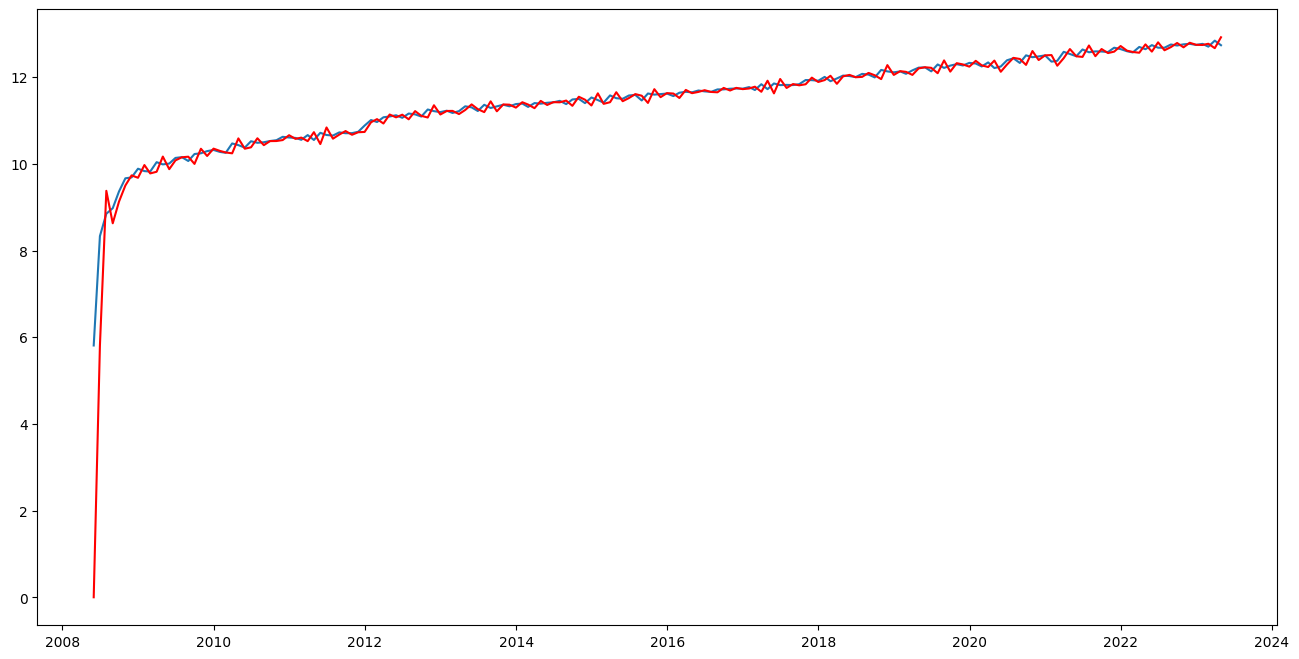

In [ ]:
import statsmodels.api as smapi

plt.figure(figsize = (16,8))
model = smapi.tsa.statespace.SARIMAX(total_fps_log , order = (3,2,3))
results_ARIMA = model.fit()
plt.plot(total_fps_log)
plt.plot(results_ARIMA.fittedvalues , color = 'red')


In [ ]:
totalfpspayments = data['total_fps_payments']

In [ ]:
#taking results back to original scale

In [ ]:
ARIMA_predictions = pd.Series(results_ARIMA.fittedvalues,copy = True)
print(ARIMA_predictions.head())

Date
2008-05-31   0.000000000
2008-06-30   5.808384183
2008-07-31   9.377977472
2008-08-31   8.629050943
2008-09-30   9.126110224
dtype: float64


Text(0.5, 1.0, 'RMSE: 17393.9864')

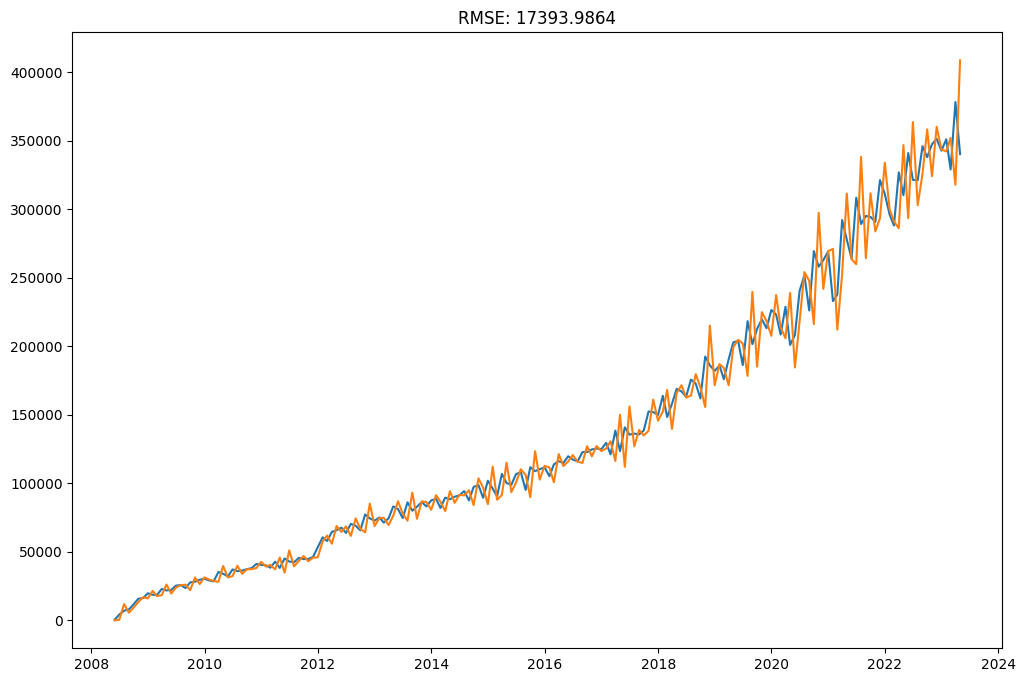

In [ ]:
plt.figure(figsize=(12,8))
predictions_ARIMA = np.exp(ARIMA_predictions)
plt.plot(totalfpspayments)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-totalfpspayments)**2)/len(totalfpspayments)))

In [ ]:
totalfpspayments

Date
2008-05-31      333.510000000
2008-06-30     4160.000000000
2008-07-31     6977.000000000
2008-08-31     7920.000000000
2008-09-30    11624.000000000
                   ...       
2022-12-31   342749.000000000
2023-01-31   351073.000000000
2023-02-28   329032.000000000
2023-03-31   378225.000000000
2023-04-30   340257.000000000
Name: total_fps_payments, Length: 180, dtype: float64

In [ ]:
predictions_ARIMA

Date
2008-05-31        1.000000000
2008-06-30      333.080493644
2008-07-31    11825.074002978
2008-08-31     5591.768826116
2008-09-30     9192.196751679
                   ...       
2022-12-31   343545.889714815
2023-01-31   342206.668993897
2023-02-28   352057.402289296
2023-03-31   317866.507242951
2023-04-30   408705.185368593
Length: 180, dtype: float64

In [ ]:
monthly_prediction_2023_2024 =results_ARIMA.predict(start='2023-01-31', end='2024-12-31',dynamic=True)

In [ ]:
monthly_prediction_2023_2024 = np.exp(monthly_prediction_2023_2024)

In [ ]:
type(monthly_prediction_2023_2024)

pandas.core.series.Series

In [ ]:
monthly_prediction_2023_2024

pandas.core.series.Series

In [ ]:
monthly_prediction_2023_2024 = monthly_prediction_2023_2024.to_frame()

In [ ]:
year = monthly_prediction_2023_2024.index.year
year

Int64Index([2008, 2008, 2008, 2008, 2008, 2008, 2008, 2008, 2009, 2009,
            ...
            2024, 2024, 2024, 2024, 2024, 2024, 2024, 2024, 2024, 2024],
           dtype='int64', length=200)

In [ ]:
monthly_prediction_2023_2024['year']= year

In [ ]:
monthly_prediction_2023_2024

,0,year
2008-05-31,1.000000000,2008
2008-06-30,333.080493644,2008
2008-07-31,11825.074002978,2008
2008-08-31,5591.768826116,2008
2008-09-30,9192.196751679,2008
...,...,...
2024-08-31,284959.244435886,2024
2024-09-30,284853.049676720,2024
2024-10-31,282075.358246620,2024
2024-11-30,281869.000524862,2024


In [ ]:
monthly_prediction_2023_2024.rename(columns = {'predicted_mean':'predicted_volume in 000s'}, inplace = True)

In [ ]:
monthly_prediction_2023_2024

,predicted_volume in 000s,year
2008-05-31,1.000000000,2008
2008-06-30,333.080493644,2008
2008-07-31,11825.074002978,2008
2008-08-31,5591.768826116,2008
2008-09-30,9192.196751679,2008
...,...,...
2024-08-31,284959.244435886,2024
2024-09-30,284853.049676720,2024
2024-10-31,282075.358246620,2024
2024-11-30,281869.000524862,2024


In [ ]:
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.9f' % x)

In [ ]:
yearly_total_volumes = monthly_prediction_2023_2024.groupby('year').sum(['predicted_volume in 000s'])
yearly_total_volumes

,predicted_volume in 000s
year,
2008,73193.110412461
2009,289470.928866126
2010,418646.140254378
2011,512812.344867719
2012,797848.689411108
2013,953541.247138869
2014,1084101.213132430
2015,1245475.993802574
2016,1410619.500355404


<Axes: xlabel='year_x'>

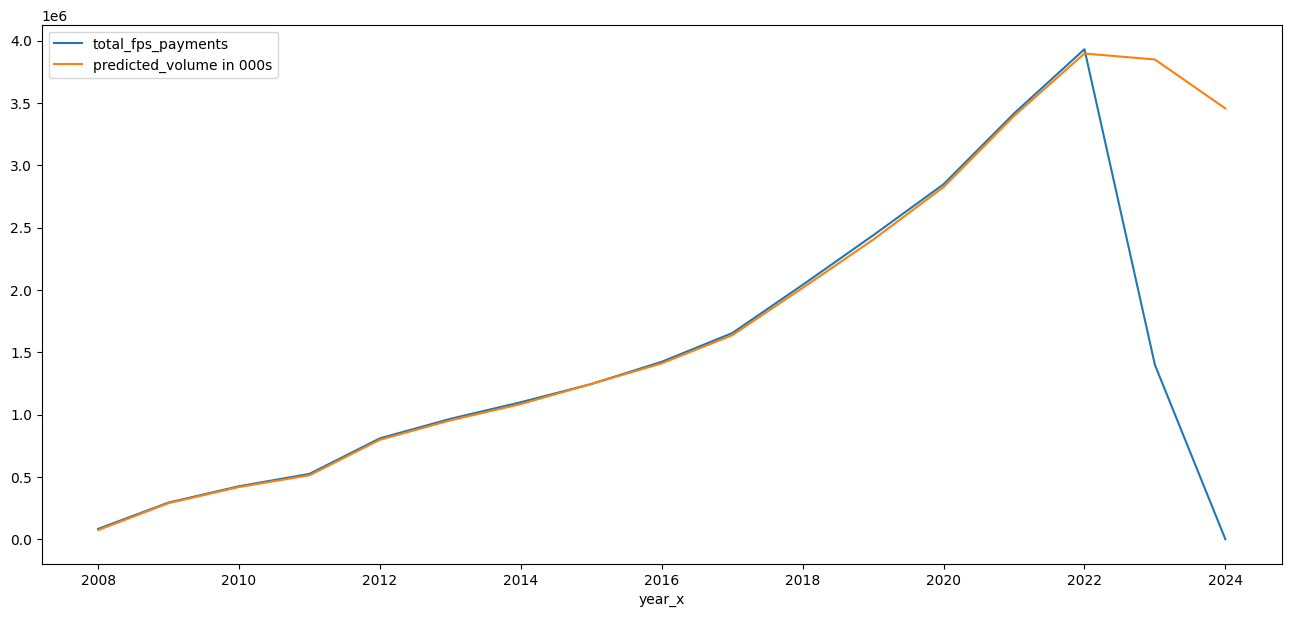

In [ ]:
yearly_total_volumes.plot(y = ['predicted_volume in 000s'])